In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Simulación numérica EDO jamiton

En el siguiente jupyter se simulará numéricamente la ecuación diferencial asociada a un jamiton. La EDO en cuestión corresponde a la siguiente expresión:

$$
v'(\chi) = \dfrac{w(v(\chi))}{r'(v(\chi))}
$$
donde $w(v) = \hat{U}(v) - mv + s$ y $r(v) = m\hat{h}(v) + m^2v$. Las funciones $U$ y $h$ vendrán dadas de manera explícita en el código. Las constantes se definirán de la misma manera.

In [2]:
# Parametros del modelo
rho_max = 1/7.5
u_max = 20

c = 0.078 * rho_max * u_max
b = 1/3
l = 1/10

tau = 3

# Funciones del modelo
def h(rho, rho_max=rho_max):
    sqrt = np.sqrt(rho/(rho_max - rho))
    return 8 * sqrt

def h_prime(rho, rho_max=rho_max):
    num = 4 * rho_max
    den = np.sqrt(rho) * np.sqrt((rho_max - rho))**3
    return num / den * (-1/rho**2)

def Q(rho, c=c, b=b, l=l, rho_max=rho_max):
    
    g = lambda y: np.sqrt(1 + ((y - b)/l)**2)
    
    output = c * (g(0) + (g(1) - g(0))*(rho/rho_max) - g(rho/rho_max))
    return output

def Q_barra(rho_barra, c=c, b=b, l=l, rho_max=rho_max):
    
    g = lambda y: np.sqrt(1 + ((y - b)/l)**2)
    
    output = c * (g(0) + (g(1) - g(0))*rho_barra - g(rho_barra))
    return output

def U(rho):
    return Q(rho)/rho

def U_gorro(v):
    return U(1/v)

def h_gorro(v):
    return h(1/v)

def h_gorro_prime(v):
    return h_prime(1/v)

def w(v, m, s):
    return U_gorro(v) - (m*v + s)

def r(v, m):
    return m * h_gorro(v) + m**2 * v

def r_prime(v, m):
    return m * h_gorro_prime(v) + m**2

In [3]:
# EDO a resolver
def edo(v, chi, m, s):
    dv = w(v, m, s) / r_prime(v, m)
    return dv

## Funciones del modelo

<Figure size 640x480 with 0 Axes>

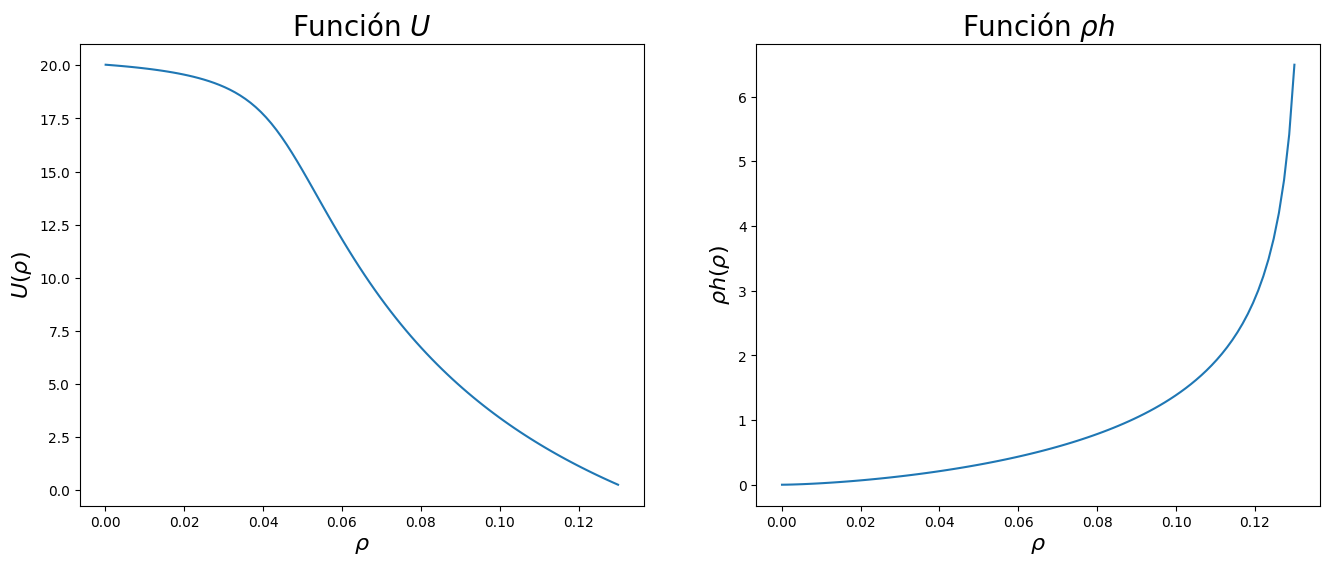

In [4]:
# Gráficos para U y rho*h
rho = np.linspace(0.0001, 0.13, 100)

plt.clf()
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(rho, U(rho))
ax[0].set_ylabel(r"$U(\rho)$", fontsize=16)
ax[0].set_xlabel(r"$\rho$", fontsize=16)
ax[0].set_title(r"Función $U$", fontsize=20)

ax[1].plot(rho, rho*h(rho))
ax[1].set_ylabel(r"$\rho h(\rho)$", fontsize=16)
ax[1].set_xlabel(r"$\rho$", fontsize=16)
ax[1].set_title(r"Función $\rho h$", fontsize=20)

#plt.savefig("Graficos/funciones_U_h")
plt.show()

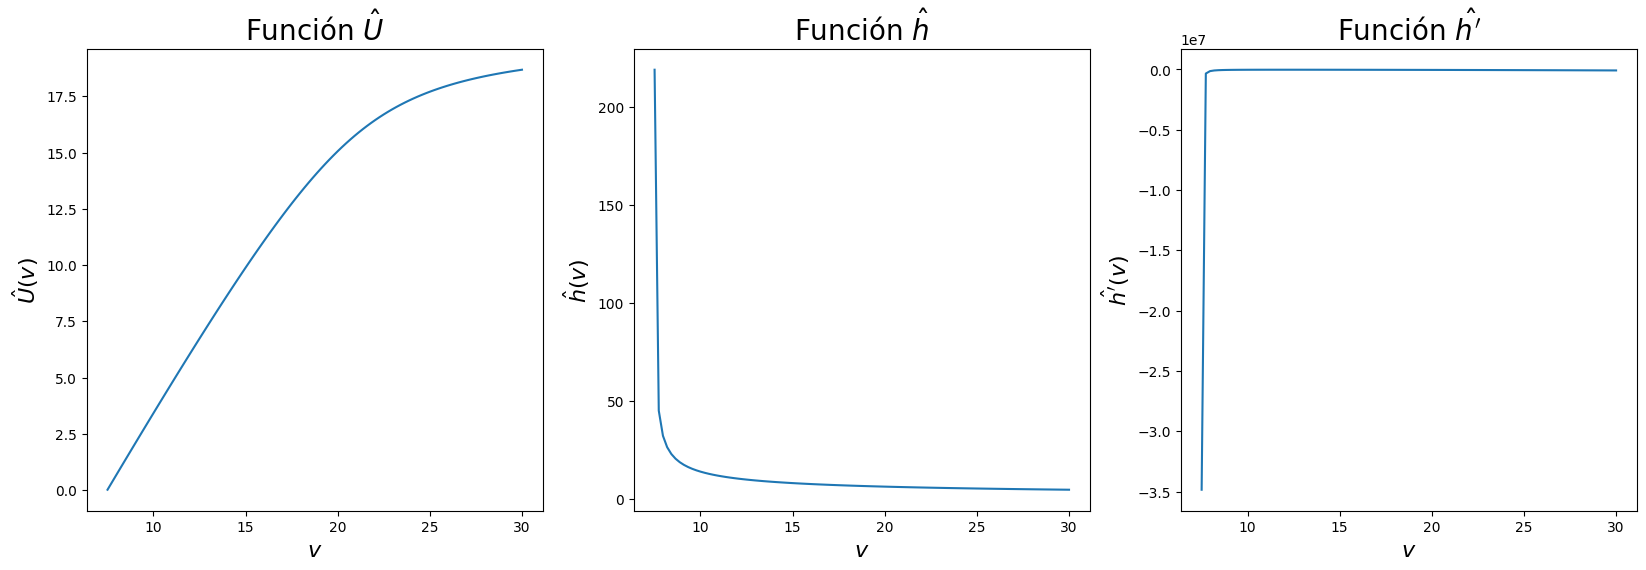

In [5]:
# Funciones U gorro ,h gorro y hprima gorro
v = np.linspace(7.51, 30, 100)

fig, ax = plt.subplots(1, 3, figsize=(20, 6))
ax[0].plot(v, U_gorro(v))
ax[0].set_ylabel(r"$\hat{U}(v)$", fontsize=16)
ax[0].set_xlabel(r"$v$", fontsize=16)
ax[0].set_title(r"Función $\hat{U}$", fontsize=20)

ax[1].plot(v, h_gorro(v))
ax[1].set_ylabel(r"$\hat{h}(v)$", fontsize=16)
ax[1].set_xlabel(r"$v$", fontsize=16)
ax[1].set_title(r"Función $\hat{h}$", fontsize=20)

ax[2].plot(v, h_gorro_prime(v))
ax[2].set_ylabel(r"$\hat{h'}(v)$", fontsize=16)
ax[2].set_xlabel(r"$v$", fontsize=16)
ax[2].set_title(r"Función $\hat{h'}$", fontsize=20)

#plt.savefig("Graficos/funciones_U_h_gorro")
plt.show()

<Figure size 640x480 with 0 Axes>

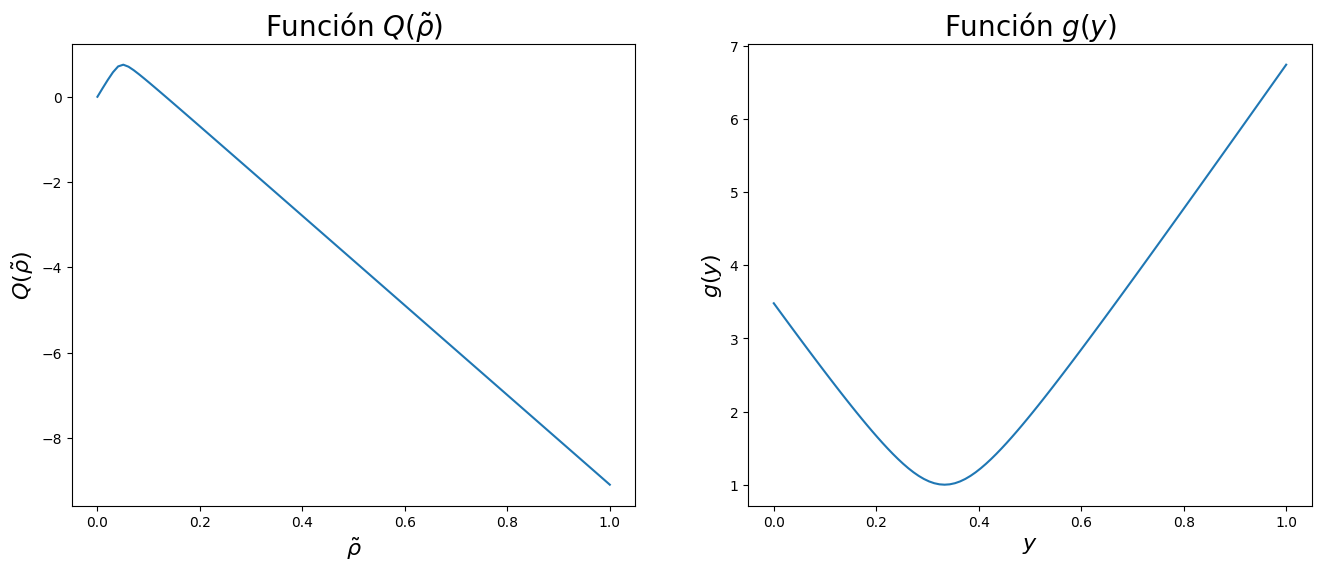

In [6]:
# Graficos para Q con rho normalizado y g
# rho barra equivale a rho/rho_max
rho_barra = np.linspace(0, 1, 100)
y_to_plot = np.linspace(0, 1, 100)
g = lambda y: np.sqrt(1 + ((y - b)/l)**2)

plt.clf()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
ax[0].plot(rho_barra, Q(rho_barra))
ax[0].set_xlabel(r"$\tilde{\rho}$", fontsize=16)
ax[0].set_ylabel(r"$Q(\tilde{\rho}$)", fontsize=16)
ax[0].set_title(r"Función $Q(\tilde{\rho})$", fontsize=20)

ax[1].plot(y_to_plot, g(y_to_plot))
ax[1].set_xlabel(r"$y$", fontsize=16)
ax[1].set_ylabel(r"$g(y)$", fontsize=16)
ax[1].set_title(r"Función $g(y)$", fontsize=20)

#plt.savefig("Graficos/Funciones_Q_g")
plt.show()

<Figure size 640x480 with 0 Axes>

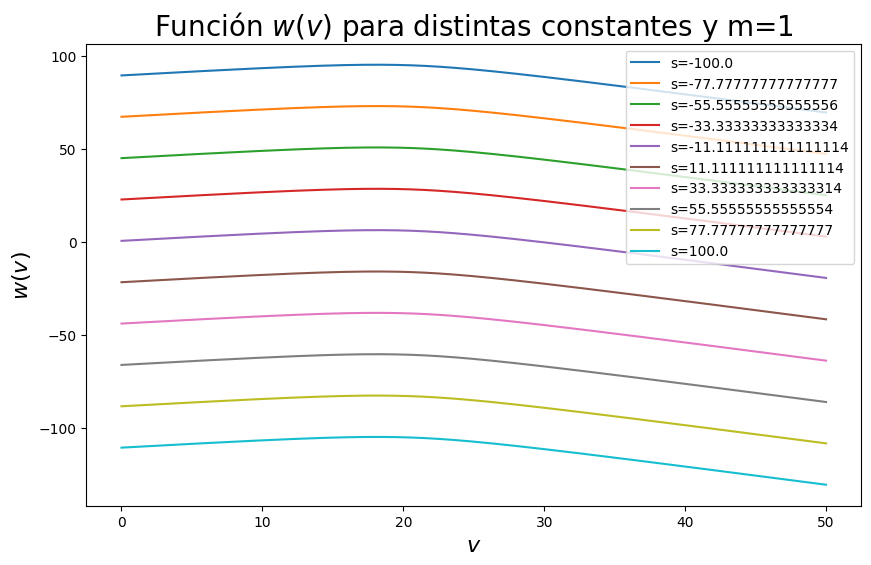

In [7]:
# Función w(v)
m = 1

v_to_plot = np.linspace(0.001, 50, 500)
ctes = np.linspace(-100, 100, 10)

plt.clf()
plt.figure(figsize=(10, 6))
for ss in ctes:
    plt.plot(v_to_plot, w(v_to_plot, m, ss), label="s={}".format(ss))
    plt.xlabel(r"$v$", fontsize=16)
    plt.ylabel(r"$w(v)$", fontsize=16)
    plt.title(r"Función $w(v)$ para distintas constantes y m={}".format(m), fontsize=20)
    plt.legend(fontsize=10, loc="upper right")

#plt.savefig("Graficos/w_distintas_ctes_m_{}".format(m))
plt.show()

<Figure size 640x480 with 0 Axes>

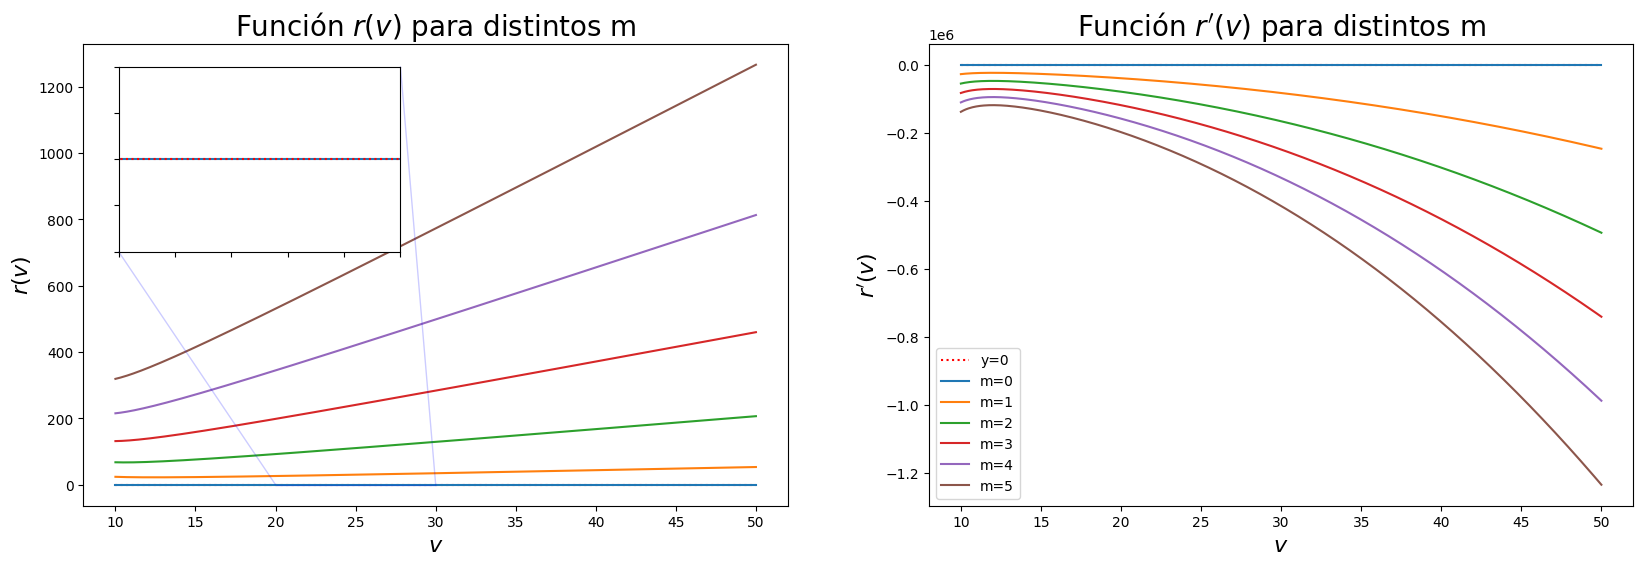

In [8]:
# Funciones r(v) y r'(v)

vmin = 10
vmax = 50
v_to_plot = np.linspace(vmin, vmax, 500)
ms = np.arange(0, 6)

plt.clf()
fig, axs = plt.subplots(1, 2, figsize=(20, 6))
axs[0].hlines(0, xmin=vmin, xmax=vmax, color="red", linestyles="dotted", label="y=0")
axs[1].hlines(0, xmin=vmin, xmax=vmax, color="red", linestyles="dotted", label="y=0")

for mm in ms:
    axs[0].plot(v_to_plot, r(v_to_plot, mm), label="m={}".format(mm))
    axs[0].set_xlabel(r"$v$", fontsize=16)
    axs[0].set_ylabel(r"$r(v)$", fontsize=16)
    axs[0].set_title(r"Función $r(v)$ para distintos m".format(m), fontsize=20)
    
    axs[1].plot(v_to_plot, r_prime(v_to_plot, mm), label="m={}".format(mm))
    axs[1].set_xlabel(r"$v$", fontsize=16)
    axs[1].set_ylabel(r"$r'(v)$", fontsize=16)
    axs[1].set_title(r"Función $r'(v)$ para distintos m".format(m), fontsize=20)
    
ax_mini = axs[0].inset_axes([0.05, 0.55, 0.4, 0.4])

ax_mini.plot(v_to_plot, r(v_to_plot, ms[0]))
ax_mini.hlines(0, xmin=vmin, xmax=vmax, color="red", linestyles="dotted")
ax_mini.set_ylim(-0.01, 0.01)
ax_mini.set_xlim(20, 30)
#ax_mini.grid()
    
ax_mini.set_xticklabels('')
ax_mini.set_yticklabels('')
axs[0].indicate_inset_zoom(ax_mini, alpha=0.2, edgecolor="blue")
    
plt.legend(fontsize=10)
#plt.savefig("Graficos/r_r_prima_distintos_m")
plt.show()

# Solución EDO para v

In [9]:
# Limites para chi
chi_min = 0
chi_max = 1000

# Crea arreglos de chi para resolver edo
chi = np.linspace(chi_min, chi_max, 10000)

# Paso espacial y condicion inicial
dx = 0.1
v0 = 10.

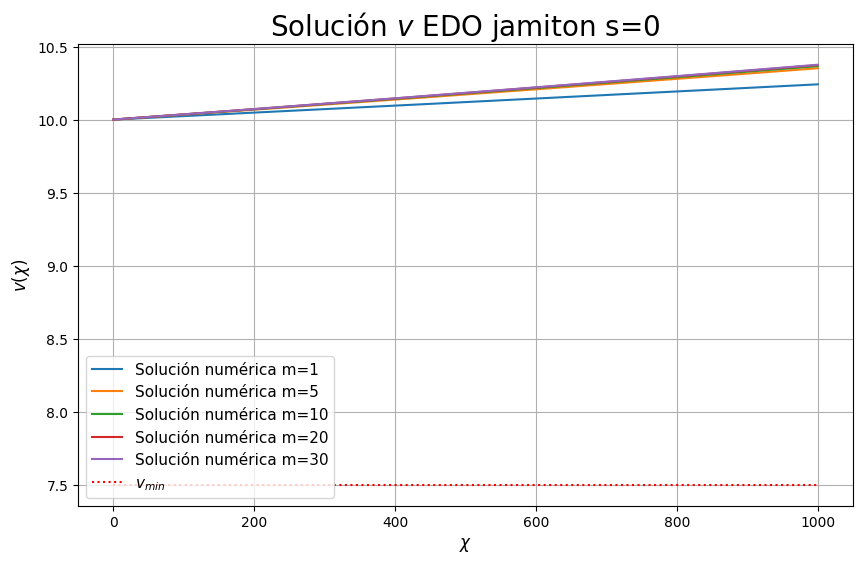

In [10]:
# Resuelve EDO para v usando distintos m's
s = 0#-1000
ms = [1, 5, 10, 20, 30]

plt.figure(figsize=(10, 6))
for i in range(len(ms)):
    m = ms[i]
    sol = odeint(edo, v0, chi, (m, s))
    plt.plot(chi, sol, label="Solución numérica m={}".format(m))

plt.hlines(1/rho_max, xmin=chi_min, xmax=chi_max, color="red", label=r"$v_{min}$", linestyles="dotted")

plt.xlabel(r"$\chi$", fontsize=12)
plt.ylabel(r"$v(\chi)$", fontsize=12)
plt.title(r"Solución $v$ EDO jamiton s={}".format(s), fontsize=20)

plt.legend(fontsize=11)
plt.grid()

#plt.savefig("Graficos/EDO_Jam_v")
plt.show()

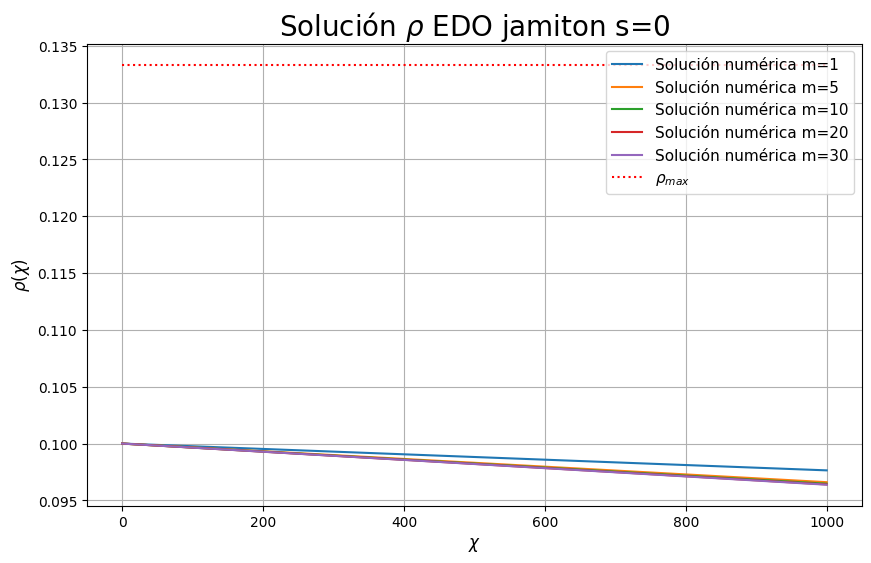

In [11]:
# Grafica rho=1/v
ms = [1, 5, 10, 20, 30]

plt.figure(figsize=(10, 6))
for i in range(len(ms)):
    m = ms[i]
    sol = odeint(edo, v0, chi, (m, s))
    plt.plot(chi, 1/sol, label="Solución numérica m={}".format(m))

plt.hlines(rho_max, xmin=chi_min, xmax=chi_max, color="red", label=r"$\rho_{max}$", linestyles="dotted")

plt.xlabel(r"$\chi$", fontsize=12)
plt.ylabel(r"$\rho(\chi)$", fontsize=12)
plt.title(r"Solución $\rho$ EDO jamiton s={}".format(s), fontsize=20)

plt.legend(fontsize=11)
plt.grid()

#plt.savefig("Graficos/EDO_Jam_rho")
plt.show()

# Modelo celular

In [12]:
class Car:
    def __init__(self, x_i, v_i, p):
        self.x = x_i
        self.v = v_i
        self.p = p

    def update_v(self):
        self.v += 1

    def reduce_speed(self, empty_cells):
        self.v -= empty_cells
        self.v = max(0, self.v)
    
    def random_slow(self):
        u = np.random.uniform()
        if self.v >= 2 and u>=p:
            self.v = 1    
    
    def get_empty_cells(self, road):
        road_without_car = road[self.x+1:]
        empty_cells = np.nonzero(road_without_car)[0][0]

        return empty_cells

    def string(self):
        print("Posición: ", self.x)
        print("Velocidad: ", self.v)

In [13]:
seed = 420
np.random.seed(seed)

T = 100
x_f = 100

N_x = 100
N_t = 100

p = 0.5

delta_t = T / N_t
delta_x = x_f / N_x

road = np.zeros((N_t, N_x))

# Primera fila. Tiempo inicial
road[0] = np.random.randint(0, 2, size=N_x)
is_car = np.nonzero(road[0])[0]

cars = np.full(len(is_car), fill_value=None)

for c in range(len(cars)):
    xi = is_car[c]
    
    # TODO: Considerar celdas vacias
    road_without_car = road[0][xi+1:]
    empty_cells = 0
    if len(np.nonzero(road_without_car)[0]) != 0:
        empty_cells = np.nonzero(road_without_car)[0][0]

    vi = np.random.randint(0, empty_cells+1)

    car = Car(xi, vi, p)
    cars[c] = car

#for car in cars:
    #car.update_v()
    #empty_cells = car.get_empty_cells(road)
    #car.reduce_speed(empty_cells)
    #car.random_slow()
    #car.x += car.v

#for t in range(N_t):
    #actual_cars = road[t]


In [14]:
cars[1].string()

Posición:  3
Velocidad:  0


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ed681c97-7ca4-4b35-b4f5-3ec87f20438e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>